<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/BinaryClassNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import os
from keras import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
tf.random.set_seed(5)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,[4]].values
# ylbl = tf.keras.utils.to_categorical(y)

In [ ]:
ss = StandardScaler()
xscl = ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xscl,y,train_size=0.8,random_state=123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 2)
(320, 1)
(80, 2)
(80, 1)


In [ ]:
# Model Architecture
mdl = tf.keras.models.Sequential()
mdl.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape=(2,)))
mdl.add(tf.keras.layers.Dense(units=5, activation='relu'))
mdl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
mdl.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(patience=20,)

In [ ]:
# Fit the model
mdl_history = mdl.fit(x_train, y_train, epochs=1000, validation_data = (x_test, y_test),callbacks=[es])

Epoch 1/1000
10/10 [==============================] - 1s 22ms/step - loss: 0.7886 - accuracy: 0.2750 - val_loss: 0.7726 - val_accuracy: 0.3500
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7743 - accuracy: 0.3250 - val_loss: 0.7610 - val_accuracy: 0.4000
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7623 - accuracy: 0.3781 - val_loss: 0.7510 - val_accuracy: 0.4125
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7520 - accuracy: 0.4375 - val_loss: 0.7426 - val_accuracy: 0.4500
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7431 - accuracy: 0.4656 - val_loss: 0.7354 - val_accuracy: 0.4875
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7359 - accuracy: 0.4875 - val_loss: 0.7292 - val_accuracy: 0.5250
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7296 - accuracy: 0.5250 - val_loss: 0.7235 - val_accuracy: 0.5625
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

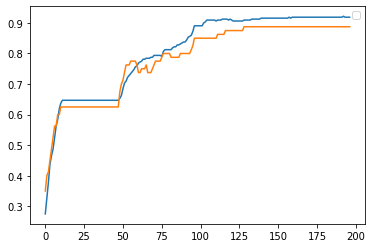

In [ ]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.legend('train','test')

In [ ]:
y_pred=mdl.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print('Confusion Matrix for test data')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix for test data
[[43  7]
 [ 2 28]]


In [ ]:
print('Classification Report for test data')
print(classification_report(y_test, y_pred))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.80      0.93      0.86        30

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.88        80
weighted avg       0.90      0.89      0.89        80



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer) :
  mdl = tf.keras.models.Sequential()
  mdl.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape=(2,)))
  mdl.add(tf.keras.layers.Dense(units=5, activation='relu'))
  mdl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  mdl.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
  return(mdl)

In [ ]:
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_classifier)
param_grid = {
    'epochs' : [100,200],
    'optimizer' : [tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop(), tf.keras.optimizers.Adagrad()],
    'batch_size' : [20,40]
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid_search = GridSearchCV(
    estimator = classifier,
    param_grid = param_grid,
    scoring = 'accuracy'
)

In [ ]:
grid_search.fit(x_train,y_train)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6550 - accuracy: 0.6172
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6523
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6992
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7109
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7344
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7734
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7773
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7852
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7969
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.8047
Epoch 11/

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.6250
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6641
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6914
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7109
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7148
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7188
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7188
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7148
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7109
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7109
Epoch 11/

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.9023
Epoch 102/200
7/7 [==============================] - 0s 5ms/step - loss: 0.4632 - accuracy: 0.9023
Epoch 103/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.9023
Epoch 104/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.9023
Epoch 105/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.9023
Epoch 106/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.9023
Epoch 107/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.9023
Epoch 108/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.9023
Epoch 109/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.9023
Epoch 110/200
7/7 [==============================] - 0s 3ms/step - loss:

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9ca7dfff90>,
             param_grid={'batch_size': [20, 40], 'epochs': [100, 200],
                         'optimizer': [<keras.optimizer_v2.adam.Adam object at 0x7f9ca7dfbb50>,
                                       <keras.optimizer_v2.adagrad.Adagrad object at 0x7f9ca7dff290>]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'batch_size': 20,
 'epochs': 200,
 'optimizer': <keras.optimizer_v2.adam.Adam at 0x7f9ca7dfbb50>}

In [ ]:
tf.__version__

'2.8.2'